### Linear Regression - Predicting Profit Of A Company

In [2]:
#Required Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
#Reading The Data Into DataFrame
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Correlation B/W Variables Of The Dataset
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


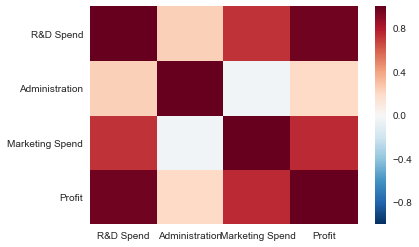

In [5]:
#The Above Correlation Metrics Can Be Converted Into HeatMap
sns.heatmap(data.corr())

In [6]:
#Splitting The Data Into Features And Labels
features = data.iloc[:,0:3].values
labels = data.iloc[:,4].values

In [7]:
#Encoding Categorical Data
'''labelEncoder = LabelEncoder()
features[:,3] = labelEncoder.fit_transform(features[:,3])

oneHotEncoder = OneHotEncoder(categorical_features = [3])
features = oneHotEncoder.fit_transform(features).toarray()'''

'labelEncoder = LabelEncoder()\nfeatures[:,3] = labelEncoder.fit_transform(features[:,3])\n\noneHotEncoder = OneHotEncoder(categorical_features = [3])\nfeatures = oneHotEncoder.fit_transform(features).toarray()'

In [8]:
#Removing Extra Column
'''features = features[:,1:]'''

'features = features[:,1:]'

In [9]:
#Splitting The Data Into Training And Testing Sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=0, test_size=0.2)

In [10]:
#Fitting Multiple Linear Regression To Training Data
regression = LinearRegression()
regression.fit(features_train, labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#Predicting The Test Results
y_pred = regression.predict(features_test)
y_pred

array([ 103901.8969696 ,  132763.05993126,  133567.90370044,
         72911.78976736,  179627.92567224,  115166.64864795,
         67113.5769057 ,   98154.80686776,  114756.11555221,
        169064.01408795])

In [12]:
#Calculating The Co-efficients
regression.coef_

array([ 0.77884104,  0.0293919 ,  0.03471025])

In [13]:
#Calculating The Intercept
regression.intercept_

42989.008165086678

In [16]:
#Calculating The R Squred Value
r2_score(labels_test,y_pred)

0.939395591782057

In [18]:
regression.score(features_test,labels_test)

0.939395591782057